In [1]:
import os, re, datetime, sys, getopt, fnmatch, time, codecs
from os.path import exists
import pandas as pd
import numpy as np
import re
import plotly
import plotly.io as pio
import cufflinks as cf
png_renderer = pio.renderers["png"]


file_name_bbc = '../BBC_reading/exсel_files/bbc_scraping.xlsx'
file_name_nz = '../BBC_reading/exсel_files/zn_ua_scraping.xlsx'
file_name_csv = '../report/report2.csv'

csv_final_report = pd.read_csv(file_name_csv)
excel_bbc_texts = pd.read_excel(file_name_bbc, index_col=0)
excel_nz_texts = pd.read_excel(file_name_nz, index_col=0)

In [2]:
from gensim import corpora
from pprint import pprint
from gensim.utils import simple_preprocess
from smart_open import smart_open

In [3]:
class ReadTxtFiles(object):
    def __init__(self, dirname):
        self.dirname = dirname
    def __iter__(self):
        for fname in os.listdir(self.dirname):
            try:
                for line in open(os.path.join(self.dirname, fname), encoding='utf-8'):
                    yield simple_preprocess(line)
            except:
                print("sdv")

In [4]:
class ReadTxtFiles2(object):
    def __init__(self, dirname):
        self.dirname = dirname
    def __iter__(self):
        for fname in self.dirname:
            try:
                    yield simple_preprocess(fname)
            except:
                print("sdv")


dictionary = corpora.Dictionary((ReadTxtFiles2(excel_bbc_texts['Topic'])))
dictionary.token2id

{'коронавірусу': 0,
 'надія': 1,
 'пандемії': 2,
 'порадіти': 3,
 'причин': 4,
 'під': 5,
 'час': 6,
 'ять': 7,
 'вас': 8,
 'захистити': 9,
 'маски': 10,
 'моз': 11,
 'не': 12,
 'щоб': 13,
 'інших': 14,
 'запроваджують': 15,
 'карантин': 16,
 'коронавірус': 17,
 'світі': 18,
 'як': 19,
 'кажуть': 20,
 'коли': 21,
 'одужав': 22,
 'першого': 23,
 'розповідь': 24,
 'тебе': 25,
 'тобі': 26,
 'українця': 27,
 'який': 28,
 'covid': 29,
 'ліки': 30,
 'міфи': 31,
 'правда': 32,
 'про': 33,
 'та': 34,
 'ібупрофен': 35,
 'заборонені': 36,
 'закриті': 37,
 'ломбардії': 38,
 'посилюють': 39,
 'пробіжки': 40,
 'ринки': 41,
 'ще': 42,
 'італійській': 43,
 'вже': 44,
 'випадків': 45,
 'каже': 46,
 'києві': 47,
 'кличко': 48,
 'україні': 49,
 'що': 50,
 'вакцини': 51,
 'випробовують': 52,
 'країнах': 53,
 'різних': 54,
 'тести': 55,
 'які': 56,
 'готувати': 57,
 'допомагають': 58,
 'люди': 59,
 'особливі': 60,
 'харкові': 61,
 'їжу': 62,
 'вулиці': 63,
 'гратися': 64,
 'дозволяти': 65,
 'дітям': 66,
 

In [5]:
from gensim.models import Word2Vec
from multiprocessing import cpu_count

In [6]:
txts3 = [i for i in ReadTxtFiles2(excel_bbc_texts['Topic']) if i]
txts3
print(txts3[0:5])

[['надія', 'ять', 'причин', 'порадіти', 'під', 'час', 'пандемії', 'коронавірусу'], ['маски', 'щоб', 'захистити', 'інших', 'не', 'вас', 'моз'], ['коронавірус', 'як', 'світі', 'запроваджують', 'карантин'], ['коли', 'тобі', 'кажуть', 'тебе', 'коронавірус', 'розповідь', 'першого', 'українця', 'який', 'одужав'], ['ібупрофен', 'covid', 'міфи', 'та', 'правда', 'про', 'ліки']]


In [7]:
type(txts3)

list

In [8]:
from gensim.models import phrases
bigram = phrases.Phrases(txts3, min_count=10)
print(txts3[1], bigram[txts3[1]])


['маски', 'щоб', 'захистити', 'інших', 'не', 'вас', 'моз'] ['маски', 'щоб', 'захистити', 'інших', 'не', 'вас', 'моз']


In [9]:
type(bigram)

gensim.models.phrases.Phrases

In [10]:
bitxts = [bigram[line] for line in txts3]
model4 = Word2Vec(txts3, min_count=10)

w2c = dict()
for item in model4.wv.vocab:
    w2c[item]=model4.wv.vocab[item].count

In [11]:
w2c = dict()
for item in model4.wv.vocab:
    w2c[item]=model4.wv.vocab[item].count
w2cSorted=dict(sorted(w2c.items(), key=lambda x: x[1],reverse=True))
del w2cSorted['на']
#k = {'та','що','він','україні','якій','не','image','caption','sport','new','до','усі','матеріали','сайті','обов','будь','україни','інтерфакс','новини','zn','ua','для','це','як','за','ua','також','про' ,'які', 'від','або','цьому','без','але'}
#for i in k :
    #del w2cSorted[i]
    
k = {'як','коронавірусу', 'та','що' ,'від','чи','не', 'про','за','це', 'до', 'без','для'  }
for i in k :
    del w2cSorted[i]
w2cSorted

{'коронавірус': 246,
 'україні': 114,
 'карантин': 77,
 'чому': 51,
 'хроніки': 50,
 'карантину': 36,
 'хворих': 35,
 'через': 35,
 'карантині': 32,
 'covid': 29,
 'інтерактивна': 26,
 'мапа': 26,
 'вже': 23,
 'які': 23,
 'під': 21,
 'нових': 21,
 'час': 19,
 'людей': 19,
 'новин': 19,
 'випадків': 18,
 'може': 18,
 'випуск': 17,
 'коли': 16,
 'кількість': 16,
 'змі': 16,
 'можна': 16,
 'сша': 15,
 'онлайн': 15,
 'зеленський': 15,
 'смертей': 14,
 'проти': 14,
 'добу': 14,
 'який': 13,
 'італії': 13,
 'буде': 13,
 'він': 13,
 'огляд': 13,
 'українців': 13,
 'більше': 13,
 'пандемію': 13,
 'коронавірусом': 13,
 'хто': 12,
 'україна': 12,
 'так': 12,
 'вчені': 12,
 'але': 12,
 'пандемії': 11,
 'померли': 11,
 'робити': 11,
 'майже': 11,
 'уряд': 11,
 'каже': 10,
 'українці': 10,
 'росія': 10,
 'трамп': 10,
 'нові': 10,
 'її': 10,
 'великдень': 10}

In [12]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

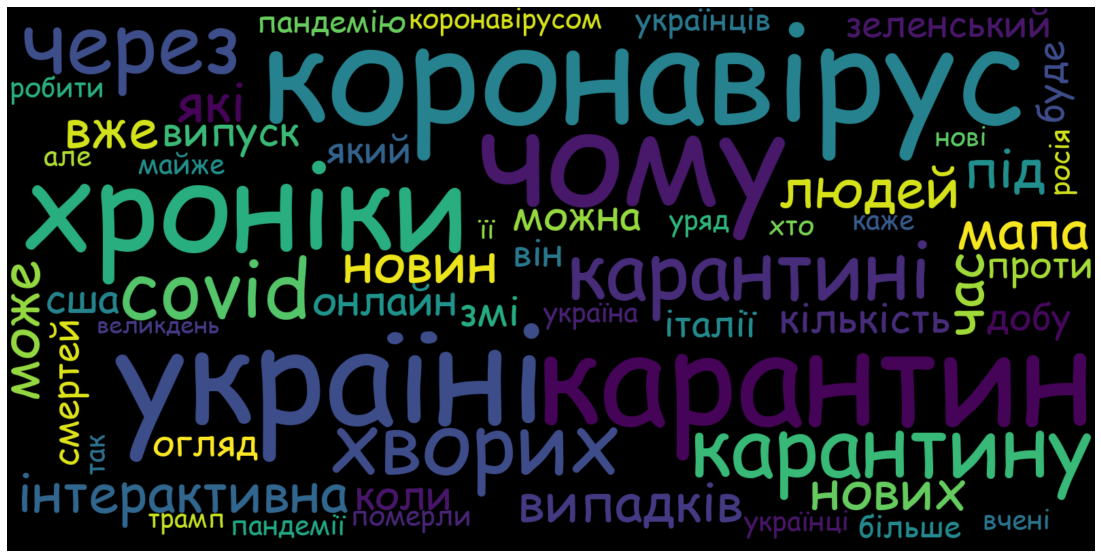

<Figure size 432x288 with 0 Axes>

In [13]:
l = list()
for i in w2cSorted.keys():
    l.append(i)   
wordcloud = WordCloud(font_path="Comic_Sans_MS.ttf", max_font_size=200, max_words=120,width=1600, height=800).generate(str(l).replace("'", ""))
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
plt.savefig(fname= "new.png" , format="png")

In [14]:
l = list()
for i in w2cSorted.keys():
    l.append(i) 
mask = np.array(Image.open("cloud.png"))
stopwords = set(STOPWORDS)
wordcloud_por = WordCloud(font_path='Bebas_Neue_Cyrillic.ttf',stopwords=stopwords, max_words=200, mask=mask).generate(str(l).replace("'", ""))

# create coloring from image
#image_colors = ImageColorGenerator(mask)
#plt.figure(figsize=(20,10))
#plt.imshow(wordcloud_por.recolor(color_func=image_colors), interpolation="bilinear")
#plt.axis("off")
wordcloud_por.to_file("dsv.png")


In [15]:
w2c = dict()
for item in model4.wv.vocab:
    w2c[item]=model4.wv.vocab[item].count
l = list()
for i in w2c.keys():
    l.append(i) 
k = 0
for i in l:
    k = k + w2c[i]
k

2491

In [ ]:

li = list()
li.append('Count')
li.append(k)
li.append('1111547 words')
mask = np.array(Image.open("coronavirus-4947717_960_720.png"))
stopwords = set(STOPWORDS)
wordcloud_por = WordCloud(font_path='Bebas_Neue_Cyrillic.ttf',stopwords=stopwords,font_path="Bebas_Neue_Cyrillic.ttf", max_words=100, mask=mask,width=1600, height=800).generate(str(li).replace("'", ""))

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud_por.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")


In [218]:
MIN_LENGTH = 15
corpus = ""
dirname="../BBC_reading/all_texts"
'''for fname in os.listdir("../BBC_reading/all_texts"):
    try:
        try:
            #with open(dirname+'/'+fname, 'r') as f:
                 #sentences+= f.read().split('.')
            corpus += str(simple_preprocess(open(os.path.join(dirname, fname), encoding='utf-8').read()))
            #corpus += str(simple_preprocess(line))
        except Exception as e:
                print(e)
        #corpus+=open(os.path.join(dirname, fname), encoding='utf-8').read()
    except Exception:
        print('Это что ещё такое?')
 '''       

for fname in excel_bbc_texts['Topic']:
    try:
        try:
            #with open(dirname+'/'+fname, 'r') as f:
                 #sentences+= f.read().split('.')
            corpus += str(simple_preprocess(fname))
            #corpus += str(simple_preprocess(line))
        except Exception as e:
                print(e)
        #corpus+=open(os.path.join(dirname, fname), encoding='utf-8').read()
    except Exception:
        print('Это что ещё такое?')
        
for fname in excel_nz_texts['Topic']:
    try:
        try:
            #with open(dirname+'/'+fname, 'r') as f:
                 #sentences+= f.read().split('.')
            corpus += str(simple_preprocess(fname))
            #corpus += str(simple_preprocess(line))
        except Exception as e:
                print(e)
        #corpus+=open(os.path.join(dirname, fname), encoding='utf-8').read()
    except Exception:
        print('Это что ещё такое?')
corpus = corpus.replace('\n',' ')
corpus = corpus.replace('\t',' ')
corpus = corpus.replace('“', ' " ')
corpus = corpus.replace('”', ' " ')
for spaced in ['.','-',',','!','?','(','—',')']:
    corpus = corpus.replace(spaced, ' {0} '.format(spaced))
#10510355 characters

In [219]:
corpus = corpus.replace(",",'')
corpus = corpus.replace("'",'')
len(corpus)

301838

In [220]:
corpus = corpus.replace('\n',' ')
corpus = corpus.replace('\t',' ')
corpus = corpus.replace('“', ' ')
corpus = corpus.replace('”', ' ')
corpus = corpus.replace(']', ' ')
corpus = corpus.replace('[', ' ')
for spaced in ['.','-',',','!','?','(','—',')']:
    corpus = corpus.replace(spaced, '')
corpus

' надія   ять   причин   порадіти   під   час   пандемії   коронавірусу  маски   щоб   захистити   інших   не   вас   моз  коронавірус   як   світі   запроваджують   карантин  коли   тобі   кажуть   тебе   коронавірус   розповідь   першого   українця   який   одужав  ібупрофен   covid   міфи   та   правда   про   ліки  закриті   ринки   заборонені   пробіжки   італійській   ломбардії   ще   посилюють   карантин  коронавірус   україні   кличко   каже   що   києві   вже   випадків  коронавірус   які   вакцини   тести   випробовують   різних   країнах  як   особливі   люди   допомагають   готувати   їжу   харкові  коронавірус   чи   дозволяти   дітям   гратися   на   вулиці  нас   не   тестують   на   коронавірус   за   що   британські   лікарі   лають   владу  як   коронавірус   по   дітях   діабетиках   колоти   пальчик   разів   на   день  коронавірус   італії   померла   рекордна   кількість   людей  коронавірус   україні   хворих   вже  таксі   uber   bolt   возитиме   лікарів   безк

In [221]:
corpus_words = corpus.split(' ')
#corpus_words = dictionary.token2id
corpus_words= [word for word in corpus_words if word != '']


In [222]:
len(corpus_words)

31671

In [223]:
corpus_words

['надія',
 'ять',
 'причин',
 'порадіти',
 'під',
 'час',
 'пандемії',
 'коронавірусу',
 'маски',
 'щоб',
 'захистити',
 'інших',
 'не',
 'вас',
 'моз',
 'коронавірус',
 'як',
 'світі',
 'запроваджують',
 'карантин',
 'коли',
 'тобі',
 'кажуть',
 'тебе',
 'коронавірус',
 'розповідь',
 'першого',
 'українця',
 'який',
 'одужав',
 'ібупрофен',
 'covid',
 'міфи',
 'та',
 'правда',
 'про',
 'ліки',
 'закриті',
 'ринки',
 'заборонені',
 'пробіжки',
 'італійській',
 'ломбардії',
 'ще',
 'посилюють',
 'карантин',
 'коронавірус',
 'україні',
 'кличко',
 'каже',
 'що',
 'києві',
 'вже',
 'випадків',
 'коронавірус',
 'які',
 'вакцини',
 'тести',
 'випробовують',
 'різних',
 'країнах',
 'як',
 'особливі',
 'люди',
 'допомагають',
 'готувати',
 'їжу',
 'харкові',
 'коронавірус',
 'чи',
 'дозволяти',
 'дітям',
 'гратися',
 'на',
 'вулиці',
 'нас',
 'не',
 'тестують',
 'на',
 'коронавірус',
 'за',
 'що',
 'британські',
 'лікарі',
 'лають',
 'владу',
 'як',
 'коронавірус',
 'по',
 'дітях',
 'діабетик

In [224]:
distinct_words = list(set(corpus_words))
word_idx_dict = {word: i for i, word in enumerate(distinct_words)}
distinct_words_count = len(list(set(corpus_words)))
distinct_words_count

9533

In [225]:
word_idx_dict['короновірус']

5104

In [226]:
random.choice(list(k_words_idx_dict.keys()))

'робота дому'

In [227]:
k = 2 # adjustable
sets_of_k_words = [ ' '.join(corpus_words[i:i+k]) for i, _ in enumerate(corpus_words[:-k]) ]

from scipy.sparse import dok_matrix

sets_count = len(list(set(sets_of_k_words)))
next_after_k_words_matrix = dok_matrix((sets_count, len(distinct_words)))

distinct_sets_of_k_words = list(set(sets_of_k_words))
k_words_idx_dict = {word: i for i, word in enumerate(distinct_sets_of_k_words)}

for i, word in enumerate(sets_of_k_words[:-k]):

    word_sequence_idx = k_words_idx_dict[word]
    next_word_idx = word_idx_dict[corpus_words[i+k]]
    next_after_k_words_matrix[word_sequence_idx, next_word_idx] +=1
    

In [228]:
distinct_sets_of_k_words

['про ризики',
 'beatles надурили',
 'тренування реал',
 'зернових році',
 'діаспора та',
 'буде скорочувати',
 'планує пом',
 'санкції на',
 'підозрою вже',
 'сильний вітер',
 'за ринок',
 'апаршина коваленко',
 'миколаївський будинок',
 'смолій нацбанк',
 'чи винні',
 'дешевшає льодовик',
 'через чутки',
 'вже бракує',
 'приватними клініками',
 'чемпіонів планують',
 'компенсації за',
 'введено режим',
 'одеським поліцейським',
 'український ан',
 'викладає китайську',
 'та собак',
 'років києві',
 'використання пцу',
 'катар мінфіні',
 'правоохоронці здійснюватимуть',
 'гривня чорний',
 'пити більше',
 'минулим шляхом',
 'відеозв язку',
 'монети двигун',
 'зміг назвати',
 'будемо жити',
 'спільний похід',
 'гірше переносять',
 'мінфін має',
 'незначно зросли',
 'та смачно',
 'повинні відбутися',
 'яті та',
 'заборонили здійснити',
 'нафтогазу суд',
 'пономарева як',
 'від на',
 'шмигаля та',
 'проти ятого',
 'перенесений на',
 'головне брифінгу',
 'ради перенесли',
 'як правильно',


In [229]:
next_word_matrix = np.zeros([distinct_words_count,distinct_words_count])
for i, word in enumerate(corpus_words[:-1]):
    first_word_idx = word_idx_dict[word]
    next_word_idx = word_idx_dict[corpus_words[i+1]]
    next_word_matrix[first_word_idx][next_word_idx] +=1

def most_likely_word_after(aWord):
    most_likely = next_after_k_words_matrix[word_idx_dict[aWord]].argmax()
    return distinct_words[most_likely]

In [230]:
most_likely_word_after('короновірус')

AttributeError: argmax not found

In [231]:
def naive_chain(seed, length=15):
    current_word = seed
    sentence = seed

    for _ in range(length):
        sentence+=' '
        next_word = most_likely_word_after(current_word)
        sentence+=next_word
        current_word = next_word
    return sentence

In [232]:
import random
from random import random  as rrr

def weighted_choice(objects, weights):
    """ returns randomly an element from the sequence of 'objects', 
        the likelihood of the objects is weighted according 
        to the sequence of 'weights', i.e. percentages."""

    weights = np.array(weights, dtype=np.float64)
    sum_of_weights = weights.sum()
    # standardization:
    np.multiply(weights, 1 / sum_of_weights, weights)
    weights = weights.cumsum()
    x = rrr()
    for i in range(len(weights)):
        if x < weights[i]:
            return objects[i]

In [239]:
import pandas as pd
import seaborn as sns
import numpy as np
import glob
def sample_next_word_after_sequence(word_sequence, alpha = 0):
    next_word_vector = next_after_k_words_matrix[k_words_idx_dict[word_sequence]]+alpha
    likelihoods = next_word_vector/next_word_vector.sum()
    
    return weighted_choice(distinct_words, likelihoods.toarray())
    
def stochastic_chain(seed, chain_length=14, seed_length=2):
    current_words = seed.split(' ')
    if len(current_words) != seed_length:
        raise ValueError(f'wrong number of words, expected {seed_length}')
    sentence = seed

    for _ in range(chain_length):
        sentence+=' '
        next_word = sample_next_word_after_sequence(' '.join(current_words))
        sentence+=next_word
        current_words = current_words[1:]+[next_word]
    return sentence
# example use    


In [241]:
for i in range(5):
    print(stochastic_chain(random.choice(list(k_words_idx_dict.keys()))))
    print('/n')

банк виділить млн на медреформу загострення зоні оос бійців альфи моз забракував куплені офісом президента тести
/n
боротьбу covid єрмак проігнорував питання про політичну за дії брата зеленський обговорив меркель перспективи нормандського формату
/n
закінчивши попередній каштру знаменитого екс футболіста затримали за порушення карантину дснс стверджують що києві радіаційний фон
/n
поранення отримали троє бійців зсу мон змінив терміни вступної кампанії до вишів та умови прийому усі
/n
подешевшала після зростання минулого тижня сьогодні венера досягне своєї максимальної яскравості вартість iphone може бути введений
/n


In [237]:
stochastic_chain("коронавірус україні", 24, 2)

'коронавірус україні інтерактивна мапа коронавірус україні підтвердили випадків зранку було коронавірус для олімпійських ігор токіо затвердили нову дату google classroom що це означає україні на коронавірус'

In [160]:
for i in range(5):
    print(naive_chain(random.choice(list(k_words_idx_dict.keys()))))
    print('/n')

NameError: name 'next_word_matrix' is not defined

In [ ]:
next_word_vector = next_after_k_words_matrix[k_words_idx_dict['тільки на короткий час'] + 3000]
likelihoods = next_word_vector/next_word_vector.sum()


In [ ]:
next_word_vector

In [172]:
import pandas as pd
import numpy as np
import re
import plotly
import plotly.io as pio
import cufflinks as cf
png_renderer = pio.renderers["png"]

In [173]:
file_name_bbc = '../BBC_reading/exсel_files/bbc_scraping.xlsx'
file_name_nz = '../BBC_reading/exсel_files/zn_ua_scraping.xlsx'
file_name_csv = '../report/report2.csv'

csv_final_report = pd.read_csv(file_name_csv)
excel_bbc_texts = pd.read_excel(file_name_bbc, index_col=0)
excel_nz_texts = pd.read_excel(file_name_nz, index_col=0)

In [175]:
excel_bbc_texts['Topic']

0      Надія є: п'ять причин порадіти під час пандемі...
1             Маски: щоб захистити інших, а не вас - МОЗ
2         Коронавірус: як у світі запроваджують карантин
3      "Коли тобі кажуть: у тебе - коронавірус". Розп...
4          Ібупрофен і Covid-19: міфи та правда про ліки
                             ...                        
866    Застрягли в морі через коронавірус: як моряків...
867    Як подолала коронавірус найстаріша жителька Іс...
868             Коронавірус в Україні. Інтерактивна мапа
869                                          Коронавірус
870    Twitter дозволив співробітникам працювати з до...
Name: Topic, Length: 871, dtype: object